In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/property-listing-data-in-bangladesh/property_listing_data_in_Bangladesh.csv


In [2]:
df = pd.read_csv("/kaggle/input/property-listing-data-in-bangladesh/property_listing_data_in_Bangladesh.csv")
df.head()

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50 Thousand
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30 Thousand
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30 Thousand
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35 Thousand
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25 Thousand


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7557 entries, 0 to 7556
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        7557 non-null   object
 1   beds         7557 non-null   object
 2   bath         7557 non-null   object
 3   area         7557 non-null   object
 4   adress       7557 non-null   object
 5   type         7557 non-null   object
 6   purpose      7557 non-null   object
 7   flooPlan     7556 non-null   object
 8   url          7557 non-null   object
 9   lastUpdated  7557 non-null   object
 10  price        7557 non-null   object
dtypes: object(11)
memory usage: 649.6+ KB


In [4]:
df.columns

Index(['title', 'beds', 'bath', 'area', 'adress', 'type', 'purpose',
       'flooPlan', 'url', 'lastUpdated', 'price'],
      dtype='object')

In [5]:
df.drop(["flooPlan","url"],axis = 1, inplace = True)
df.head(3)

,title,beds,bath,area,adress,type,purpose,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,"August 13, 2022",50 Thousand
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,"January 25, 2022",30 Thousand
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,"February 22, 2023",30 Thousand


In [6]:
df.isnull().sum()

title          0
beds           0
bath           0
area           0
adress         0
type           0
purpose        0
lastUpdated    0
price          0
dtype: int64

In [7]:
df.area.fillna(method = "ffill", inplace = True)
df.isnull().sum()

title          0
beds           0
bath           0
area           0
adress         0
type           0
purpose        0
lastUpdated    0
price          0
dtype: int64

In [8]:
h_type = df['type'].value_counts()
h_type

Apartment    7489
Duplex         47
Building       21
Name: type, dtype: int64

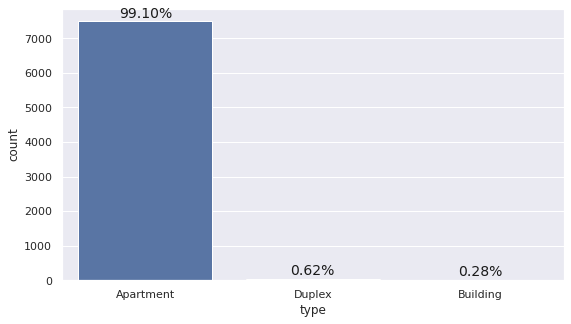

In [9]:
sns.set()
plt.figure(figsize=(9,5))
sns.countplot(x = df["type"], data = df)

for i in range(h_type.shape[0]):
    num = h_type.values[i]
    text = "{:0.2f}%".format(100*(num/df.shape[0]))
    plt.text(i,num+100, text, ha= "center", color = "k",fontsize=14)


In [15]:
list(df['type'].value_counts().keys())

['Apartment', 'Duplex', 'Building']

In [44]:
df.purpose.value_counts()

For Rent    7557
Name: purpose, dtype: int64

In [45]:
df["PriceUnit"] =df["price"].apply(lambda x: x.split(" ")[1])#[:5])
df["PriceUnit"].value_counts()

Thousand    7131
Lakh         426
Name: PriceUnit, dtype: int64

In [47]:
df[df['PriceUnit'] == "Thousand"].head(2)

,title,beds,bath,area,adress,type,purpose,lastUpdated,price,PriceUnit
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,"August 13, 2022",50 Thousand,Thousand
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,"January 25, 2022",30 Thousand,Thousand


In [48]:
df["area_sqft"] = df["area"].apply(lambda x: x.split(" ")[0])

In [49]:
df["area_sqft"] = df["area_sqft"].apply(lambda x: int(x.replace(",", "")))
df.head(2)

,title,beds,bath,area,adress,type,purpose,lastUpdated,price,PriceUnit,area_sqft
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,"August 13, 2022",50 Thousand,Thousand,2200
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,"January 25, 2022",30 Thousand,Thousand,1400


In [50]:
df = df.sort_values("area_sqft", ascending = False)
df.head()

,title,beds,bath,area,adress,type,purpose,lastUpdated,price,PriceUnit,area_sqft
6936,"Now You Can Afford To Dwell Well, Check This 3...",36,10,"31,500 sqft","Block K, Baridhara, Dhaka",Building,For Rent,"February 19, 2023",20 Lakh,Lakh,31500
555,21000 Square Feet Well-constructed Building Is...,7,8,"21,000 sqft","Block G, Bashundhara R-A, Dhaka",Building,For Rent,"January 5, 2023",7 Lakh,Lakh,21000
5615,Visit This 19360 Sq Ft Full Building Which Is ...,21,10,"19,360 sqft","Block K, Baridhara, Dhaka",Building,For Rent,"November 2, 2022",16.6 Lakh,Lakh,19360
2548,18000 Sq Ft Full Residential Building Is Avail...,32,10,"18,000 sqft","Block D, Bashundhara R-A, Dhaka",Building,For Rent,"January 11, 2023",5 Lakh,Lakh,18000
372,16100 Sq Ft Full Building Is For Rent In Uttara-6,21,10,"16,100 sqft","Road No 2, Sector 6, Uttara, Dhaka",Building,For Rent,"September 1, 2022",10 Lakh,Lakh,16100


In [51]:
df['Price'] = df['price'].apply(lambda x: float(x.split(" ")[0])*1000 if x.split(" ")[1] == "Thousand" else float(x.split(" ")[0]) *100000)
df.head(3)

,title,beds,bath,area,adress,type,purpose,lastUpdated,price,PriceUnit,area_sqft,Price
6936,"Now You Can Afford To Dwell Well, Check This 3...",36,10,"31,500 sqft","Block K, Baridhara, Dhaka",Building,For Rent,"February 19, 2023",20 Lakh,Lakh,31500,2000000.0
555,21000 Square Feet Well-constructed Building Is...,7,8,"21,000 sqft","Block G, Bashundhara R-A, Dhaka",Building,For Rent,"January 5, 2023",7 Lakh,Lakh,21000,700000.0
5615,Visit This 19360 Sq Ft Full Building Which Is ...,21,10,"19,360 sqft","Block K, Baridhara, Dhaka",Building,For Rent,"November 2, 2022",16.6 Lakh,Lakh,19360,1660000.0


In [52]:
df.groupby(df['type'])["Price"].mean()

type
Apartment     31034.477233
Building     666666.666667
Duplex       236553.191489
Name: Price, dtype: float64

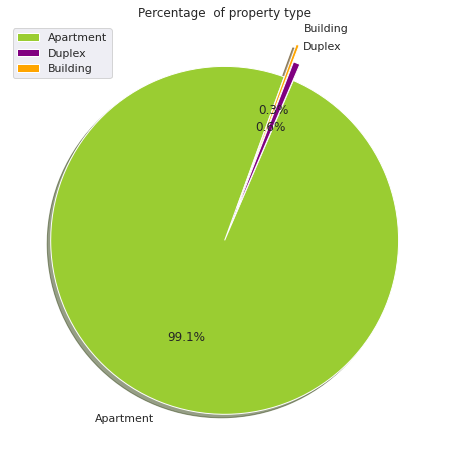

In [53]:
color = ["yellowgreen","purple","orange"]
plt.rcParams["figure.figsize"] = (10,8)
labels = list(df['type'].value_counts().keys())
df['type'].value_counts().plot.pie(y="type",startangle=70, colors = color, explode = (0,0.1,0.2), shadow = True, autopct = "%0.1f%%")
plt.title("Percentage  of property type")
plt.legend(labels,loc = "upper left")
plt.axis("off")
plt.show()

In [54]:
df['beds'] = df['beds'].apply(lambda x: int(x.split(" ")[0]))
df['bath'] = df['bath'].apply(lambda x: int(x.split(" ")[0]))

In [55]:
df["bed_bath"] = df["beds"]+df["bath"]
df.head(2)

,title,beds,bath,area,adress,type,purpose,lastUpdated,price,PriceUnit,area_sqft,Price,bed_bath
6936,"Now You Can Afford To Dwell Well, Check This 3...",36,10,"31,500 sqft","Block K, Baridhara, Dhaka",Building,For Rent,"February 19, 2023",20 Lakh,Lakh,31500,2000000.0,46
555,21000 Square Feet Well-constructed Building Is...,7,8,"21,000 sqft","Block G, Bashundhara R-A, Dhaka",Building,For Rent,"January 5, 2023",7 Lakh,Lakh,21000,700000.0,15


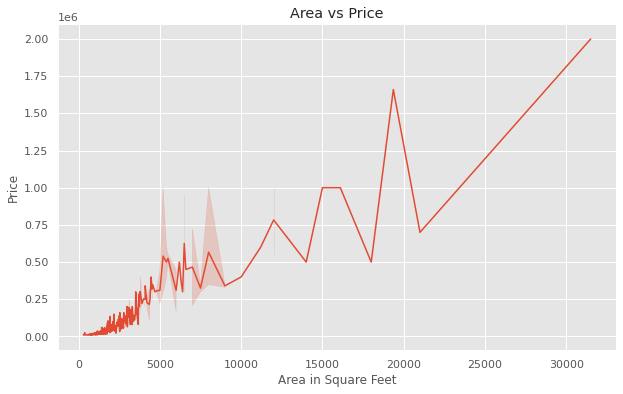

In [65]:
plt.figure(figsize = (10,6))
plt.style.use("ggplot")
sns.lineplot(x=df["area_sqft"], y = df["Price"])
plt.title("Area vs Price")
plt.xlabel("Area in Square Feet")
plt.ylabel("Price")
plt.show()

In [69]:
df["Location"] = df['adress'].apply(lambda x: x.split(" ")[-1])
df.head(2)

,title,beds,bath,area,adress,type,purpose,lastUpdated,price,PriceUnit,area_sqft,Price,bed_bath,Location
6936,"Now You Can Afford To Dwell Well, Check This 3...",36,10,"31,500 sqft","Block K, Baridhara, Dhaka",Building,For Rent,"February 19, 2023",20 Lakh,Lakh,31500,2000000.0,46,Dhaka
555,21000 Square Feet Well-constructed Building Is...,7,8,"21,000 sqft","Block G, Bashundhara R-A, Dhaka",Building,For Rent,"January 5, 2023",7 Lakh,Lakh,21000,700000.0,15,Dhaka


In [70]:
df["Location"].value_counts()

Dhaka         5332
Chattogram    2225
Name: Location, dtype: int64

In [73]:
df.groupby(["Location","type"])["Price"].mean()

Location    type     
Chattogram  Apartment     19813.964817
            Building      70000.000000
            Duplex       105714.285714
Dhaka       Apartment     35752.966616
            Building     696500.000000
            Duplex       259450.000000
Name: Price, dtype: float64

In [75]:

a = df.groupby(["Location","type"])["Price"].mean()
a = a.to_frame()
a = a.reset_index(level=["Location","type"])
a

,Location,type,Price
0,Chattogram,Apartment,19813.964817
1,Chattogram,Building,70000.000000
2,Chattogram,Duplex,105714.285714
3,Dhaka,Apartment,35752.966616
4,Dhaka,Building,696500.000000
5,Dhaka,Duplex,259450.000000


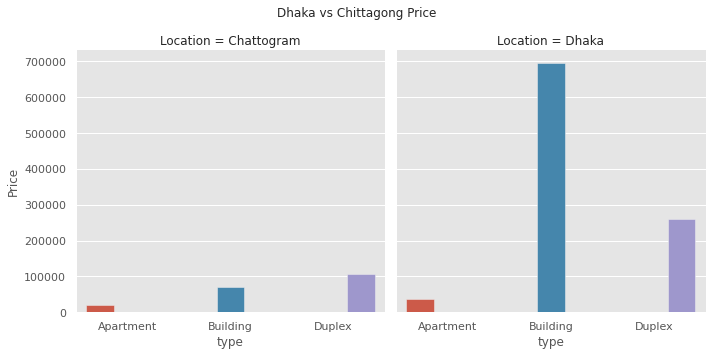

In [88]:
plt.rcParams['figure.figsize'] = (9,8)
sns.catplot(x = "type", y = "Price", col = "Location", hue = "type",
            data = a, kind = "bar")
plt.suptitle("Dhaka vs Chittagong Price")
plt.tight_layout()
plt.show()

In [89]:
df.head(2)

,title,beds,bath,area,adress,type,purpose,lastUpdated,price,PriceUnit,area_sqft,Price,bed_bath,Location
6936,"Now You Can Afford To Dwell Well, Check This 3...",36,10,"31,500 sqft","Block K, Baridhara, Dhaka",Building,For Rent,"February 19, 2023",20 Lakh,Lakh,31500,2000000.0,46,Dhaka
555,21000 Square Feet Well-constructed Building Is...,7,8,"21,000 sqft","Block G, Bashundhara R-A, Dhaka",Building,For Rent,"January 5, 2023",7 Lakh,Lakh,21000,700000.0,15,Dhaka


In [90]:
n_df = df[["beds", "bath","type", "Location", "area_sqft", "Price"]]
n_df.head(3)

,beds,bath,type,Location,area_sqft,Price
6936,36,10,Building,Dhaka,31500,2000000.0
555,7,8,Building,Dhaka,21000,700000.0
5615,21,10,Building,Dhaka,19360,1660000.0


In [92]:
n_df = pd.get_dummies(n_df, drop_first = True)
n_df.head()

,beds,bath,area_sqft,Price,type_Building,type_Duplex,Location_Dhaka
6936,36,10,31500,2000000.0,1,0,1
555,7,8,21000,700000.0,1,0,1
5615,21,10,19360,1660000.0,1,0,1
2548,32,10,18000,500000.0,1,0,1
372,21,10,16100,1000000.0,1,0,1


In [95]:
x = n_df.drop("Price", axis = 1)
y = n_df["Price"]

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.2)

In [100]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x,y)

LinearRegression()

In [101]:
y_pred = clf.predict(x_test)
y_pred[:15]

array([17912.22671041, 15754.23625916, 27540.6526791 , 76161.68153889,
       28429.37628114, -1045.6262967 , 28429.37628114,  6882.10710981,
       34579.06950604, 18773.96653266, 18773.96653266, 66130.51821823,
       17912.22671041, 11762.5334855 , 18773.96653266])

In [104]:
from sklearn.metrics import mean_squared_error, r2_score
msr = mean_squared_error(y_test, y_pred)
rs = r2_score(y_test, y_pred)
msr, rs

(767671086.8596308, 0.7292565920002334)

In [121]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [122]:
xgb_pred = xgb.predict(x_test)
xgb_msr = mean_squared_error(y_test, xgb_pred)
xgb_rs = r2_score(y_test, xgb_pred)
print("Mean Squared Error: ", xgb_msr)
print("R2 score: ", xgb_rs)

Mean Squared Error:  247440188.61914223
R2 score:  0.9127324174511977


In [124]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(x,y)

LGBMRegressor()

In [125]:
lgbm_pred = lgbm.predict(x_test)
lgbm_msr = mean_squared_error(y_test, lgbm_pred)
lgbm_rs = r2_score(y_test, lgbm_pred)
print("Mean Squared Error: ", lgbm_msr)
print("R2 score: ", lgbm_rs)

Mean Squared Error:  535437885.8566441
R2 score:  0.8111609509978522


In [135]:
pred_df = pd.DataFrame({"Actual Value": y_test,"LR": y_pred, "XGB": xgb_pred, "LGBM": lgbm_pred})
pred_df.head()

,Actual Value,LR,XGB,LGBM
6806,19000.0,17912.226710,21263.802734,20946.941022
3603,20000.0,15754.236259,17156.388672,17209.796613
6244,19000.0,27540.652679,30161.283203,26852.457112
3813,150000.0,76161.681539,66151.125000,69188.049546
6744,26000.0,28429.376281,24220.935547,24311.770649


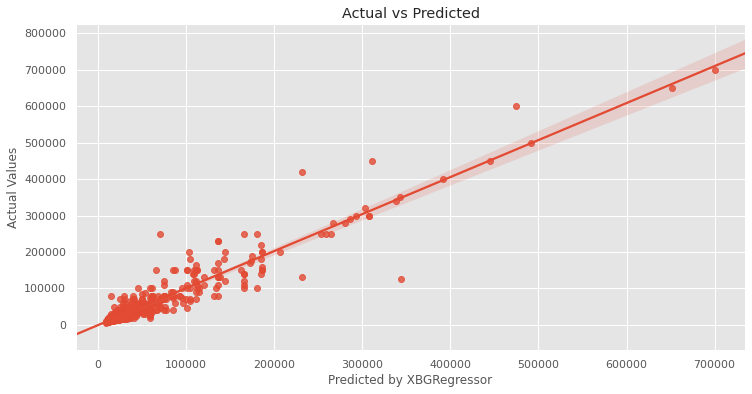

In [138]:
plt.figure(figsize=(12,6))
sns.regplot(xgb_pred,y_test,truncate=False)
plt.title('Actual vs Predicted')
plt.xlabel('Predicted by XBGRegressor')
plt.ylabel('Actual Values')
plt.show()